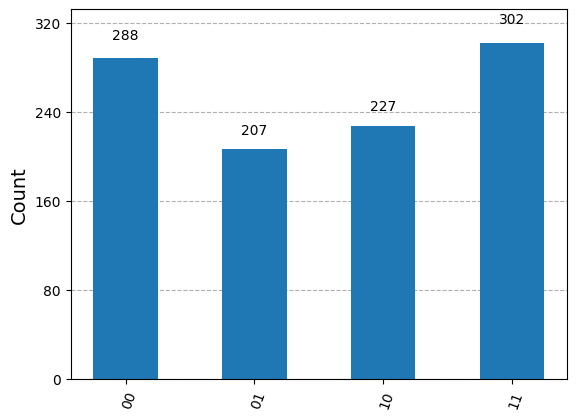

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Define the circuit for two qubits
qr = QuantumCircuit(2)
# Assume alpha and beta are normalized (e.g., alpha = 1/sqrt(2), beta = 1/sqrt(2) for simplicity)
alpha, beta = 1/2**0.5, 1/2**0.5  # Example values, adjust as needed
# Prepare a state close to the target (simplified preparation)
qr.h(0)  # Superposition on first qubit
qr.cx(0, 1)  # Entangle with second qubit
qr.ry(2 * alpha, 0)  # Adjust phase (approximation)

# Measure
qr.measure_all()

# Simulate
simulator = AerSimulator()
result = simulator.run(qr, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

Testing minimal statevector simulation...
Minimal statevector test successful: Statevector([0.92387953+0.j, 0.38268343+0.j],
            dims=(2,))

Quantum Teleportation Circuit:


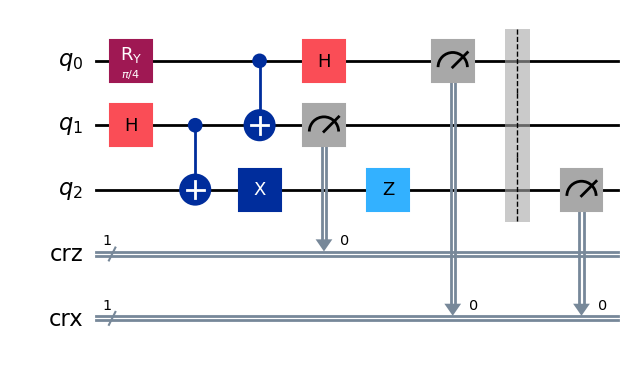

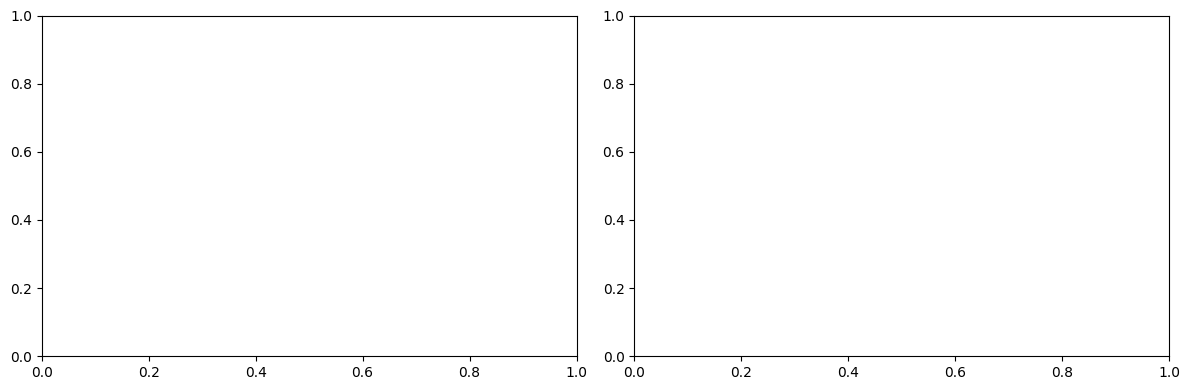


Measurement Counts (q[2] after teleportation):
{'1 1': 82, '0 0': 79, '1 0': 440, '0 1': 423}


In [8]:
# Import necessary Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

# Test minimal statevector simulation
print("Testing minimal statevector simulation...")
test_circuit = QuantumCircuit(1)
test_circuit.ry(np.pi / 4, 0)
simulator_test = Aer.get_backend('statevector_simulator')
job_test = simulator_test.run(test_circuit)
result_test = job_test.result()
statevector_test = result_test.get_statevector()
print("Minimal statevector test successful:", statevector_test)

# Set up quantum registers
qr = QuantumRegister(3, 'q')  # 3 qubits: q[0] (to teleport), q[1] (Alice's), q[2] (Bob's)

# Create the full circuit with measurements and corrections
crz = ClassicalRegister(1, 'crz')  # For Z correction
crx = ClassicalRegister(1, 'crx')  # For X correction
circuit_full = QuantumCircuit(qr, crz, crx)

# 1. Prepare a random state to teleport on q[0]
theta = np.pi / 4  # Example angle for a superposition state
circuit_full.ry(theta, qr[0])  # Apply rotation to create |ψ⟩

# 2. Create a Bell pair between q[1] (Alice) and q[2] (Bob)
circuit_full.h(qr[1])  # Hadamard on q[1]
circuit_full.cx(qr[1], qr[2])  # CNOT with q[1] as control, q[2] as target

# 3. Bell measurement by Alice on q[0] and q[1]
circuit_full.cx(qr[0], qr[1])  # CNOT with q[0] as control, q[1] as target
circuit_full.h(qr[0])  # Hadamard on q[0]
circuit_full.measure(qr[0], crx[0])  # Measure q[0] for X basis
circuit_full.measure(qr[1], crz[0])  # Measure q[1] for Z basis

# 4. Classical correction by Bob (using if_test)
circuit_full.x(qr[2])  # Add X gate
circuit_full.if_test((crx, 1))  # Apply condition on the previous instruction
circuit_full.z(qr[2])  # Add Z gate
circuit_full.if_test((crz, 1))  # Apply condition on the previous instruction

# Barrier for clarity
circuit_full.barrier()

# Measure Bob's qubit to check the teleported state
circuit_full.measure(qr[2], crx[0])  # Reuse crx for final measurement

# Create a fresh measurement-free circuit for statevector analysis
circuit_state = QuantumCircuit(3)  # 3 qubits, no classical registers
circuit_state.ry(theta, 0)  # Initial state on q[0]
circuit_state.h(1)  # Bell pair on q[1]
circuit_state.cx(1, 2)  # Entangle q[1] and q[2]
circuit_state.cx(0, 1)  # Bell measurement CNOT
circuit_state.h(0)  # Bell measurement Hadamard

# Draw the full circuit
print("\nQuantum Teleportation Circuit:")
display(circuit_full.draw('mpl', fold=-1))

# Simulate the statevector (pre-measurement) with explicit backend
simulator_state = Aer.get_backend('statevector_simulator')
job_state = simulator_state.run(circuit_state)
result_state = job_state.result()
statevector = result_state.get_statevector()

# Visualize the initial state on q[0]
initial_circuit = QuantumCircuit(1)
initial_circuit.ry(theta, 0)
initial_state = Aer.get_backend('statevector_simulator').run(initial_circuit).result().get_statevector()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_bloch_multivector(initial_state, title="Initial State on q[0]")
plt.subplot(1, 2, 2)
plot_bloch_multivector(statevector, title="Statevector after Bell Measurement (q[2] component)")
plt.tight_layout()
plt.show()

# Run the full circuit with shots to get measurement statistics
simulator_counts = AerSimulator()
job_counts = simulator_counts.run(circuit_full, shots=1024)
result_counts = job_counts.result()  # Get the Result object
counts = result_counts.get_counts()
print("\nMeasurement Counts (q[2] after teleportation):")
print(counts)
plot_histogram(counts, title="Teleportation Outcome Distribution")
plt.show()

CHSH Game

In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a Bell state
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Define rotation angles for CHSH
theta_a1 = np.pi / 4  # Alice's second basis
theta_b1 = 3 * np.pi / 4  # Bob's second basis

# Rotate measurement bases
qc.ry(theta_a1, 0)  # Rotate Alice's qubit
qc.ry(theta_b1, 1)  # Rotate Bob's qubit

# Measure in computational basis (simulating rotated bases)
qc.measure([0, 1], [0, 1])

# Simulate
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Analyze outcomes (simplified CHSH logic)
print("Measurement Counts:", counts)
# Further processing would compare a ⊕ b with x · y based on input distribution

Measurement Counts: {'11': 237, '01': 247, '00': 263, '10': 277}


Raw counts for (x, y) = (0, 1): {'1 0': 1}
Raw counts for (x, y) = (0, 0): {'1 1': 1}
Raw counts for (x, y) = (0, 1): {'0 1': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (0, 1): {'1 0': 1}
Raw counts for (x, y) = (0, 0): {'1 1': 1}
Raw counts for (x, y) = (0, 0): {'1 1': 1}
Raw counts for (x, y) = (1, 0): {'1 1': 1}
Raw counts for (x, y) = (1, 1): {'0 1': 1}
Raw counts for (x, y) = (1, 0): {'0 0': 1}
Raw counts for (x, y) = (1, 0): {'1 1': 1}
Raw counts for (x, y) = (1, 1): {'0 0': 1}
Raw counts for (x, y) = (1, 1): {'1 0': 1}
Raw counts for (x, y) = (1, 1): {'0 0': 1}
Raw counts for (x, y) = (1, 1): {'0 0': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (1, 1): {'0 1': 1}
Raw counts for (x, y) = (1, 0): {'0 0': 1}
Raw counts for (x, y) = (1, 0): {'0 0': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (0, 0): {'1 1': 1}
Raw counts for (x, y) = (1, 1): {'0 1': 1}
Raw counts for (x, y) = (1, 1): {'0 1': 1}
Raw counts 

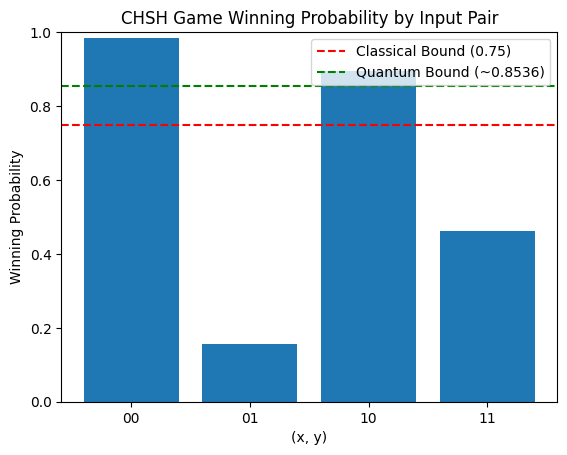

In [15]:
# Import necessary Qiskit modules
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define measurement angles for CHSH (optimized for maximum violation)
# Alice's bases: 0° (x=0) and 22.5° (x=1)
# Bob's bases: 0° (y=0) and 67.5° (y=1)
theta_a0 = 0.0  # Alice's first basis (σ_z)
theta_a1 = np.pi / 8  # Alice's second basis (22.5°)
theta_b0 = 0.0  # Bob's first basis (σ_z)
theta_b1 = 3 * np.pi / 8  # Bob's second basis (67.5°)

# Function to create CHSH circuit for given inputs x, y
def create_chsh_circuit(x, y):
    # Quantum and classical registers
    qr = QuantumRegister(2, 'q')
    cr_a = ClassicalRegister(1, 'cr_a')
    cr_b = ClassicalRegister(1, 'cr_b')
    qc = QuantumCircuit(qr, cr_a, cr_b)

    # Prepare Bell state
    qc.h(qr[0])
    qc.cx(qr[0], qr[1])

    # Apply rotations based on inputs x, y
    if x == 1:
        qc.ry(2 * theta_a1, qr[0])  # Rotate Alice's qubit
    else:
        qc.ry(2 * theta_a0, qr[0])  # Identity rotation (0°)
    if y == 1:
        qc.ry(2 * theta_b1, qr[1])  # Rotate Bob's qubit
    else:
        qc.ry(2 * theta_b0, qr[1])  # Identity rotation (0°)

    # Measure in computational basis
    qc.measure(qr[0], cr_a[0])
    qc.measure(qr[1], cr_b[0])

    return qc

# Simulate CHSH game for multiple rounds
n_shots = 1024
results = {'00': 0, '01': 0, '10': 0, '11': 0}  # Count wins for each (x, y)
for _ in range(n_shots):
    # Randomly choose inputs x, y
    x = np.random.randint(0, 2)
    y = np.random.randint(0, 2)

    # Create and run circuit
    qc = create_chsh_circuit(x, y)
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1)
    result = job.result()
    counts = result.get_counts()

    # Debug: Print raw counts to inspect format
    print(f"Raw counts for (x, y) = ({x}, {y}): {counts}")

    # Get outcomes (a, b) - Handle space-separated format
    key = list(counts.keys())[0]
    outcomes = key.split()  # Split the space-separated string
    if len(outcomes) == 2 and all(c in '01' for c in ''.join(outcomes)):  # Validate
        a = int(outcomes[0])  # Alice's outcome
        b = int(outcomes[1])  # Bob's outcome
    else:
        print(f"Warning: Invalid key format {key}, skipping this round")
        continue

    # Check if they win (a ⊕ b = x · y)
    win_condition = (a ^ b) == (x & y)
    if win_condition:
        results[str(x) + str(y)] += 1

# Calculate winning probability for each (x, y) pair
win_probs = {key: value / (n_shots / 4) for key, value in results.items()}  # Normalize by 256 shots per (x, y)
total_win_prob = sum(results.values()) / n_shots

# Print results
print(f"\nWinning probability for each (x, y): {win_probs}")
print(f"Overall winning probability: {total_win_prob:.4f}")
print(f"Classical bound: 0.75 (with shared randomness: 0.8536)")
print(f"Quantum maximum (Tsirelson bound): ~0.8536")

# Visualize results
plt.bar(win_probs.keys(), win_probs.values())
plt.title("CHSH Game Winning Probability by Input Pair")
plt.xlabel("(x, y)")
plt.ylabel("Winning Probability")
plt.ylim(0, 1)
plt.axhline(y=0.75, color='r', linestyle='--', label='Classical Bound (0.75)')
plt.axhline(y=0.8536, color='g', linestyle='--', label='Quantum Bound (~0.8536)')
plt.legend()
plt.show()

# Optional: Plot histogram of raw counts for a specific (x, y)
qc_sample = create_chsh_circuit(1, 1)
job_sample = simulator.run(qc_sample, shots=1024)
result_sample = job_sample.result()
counts_sample = result_sample.get_counts()
plot_histogram(counts_sample, title="Measurement Outcomes for (x, y) = (1, 1)")
plt.show()

Raw counts for (x, y) = (0, 1): {'1 0': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (0, 1): {'1 0': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (0, 1): {'1 0': 1}
Raw counts for (x, y) = (0, 0): {'1 1': 1}
Raw counts for (x, y) = (0, 0): {'1 1': 1}
Raw counts for (x, y) = (1, 0): {'0 0': 1}
Raw counts for (x, y) = (1, 1): {'1 0': 1}
Raw counts for (x, y) = (1, 0): {'0 0': 1}
Raw counts for (x, y) = (1, 0): {'1 1': 1}
Raw counts for (x, y) = (1, 1): {'0 1': 1}
Raw counts for (x, y) = (1, 1): {'1 1': 1}
Raw counts for (x, y) = (1, 1): {'1 1': 1}
Raw counts for (x, y) = (1, 1): {'1 0': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (1, 1): {'0 0': 1}
Raw counts for (x, y) = (1, 0): {'1 1': 1}
Raw counts for (x, y) = (1, 0): {'1 1': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (0, 0): {'0 0': 1}
Raw counts for (x, y) = (1, 1): {'0 1': 1}
Raw counts for (x, y) = (1, 1): {'1 0': 1}
Raw counts 

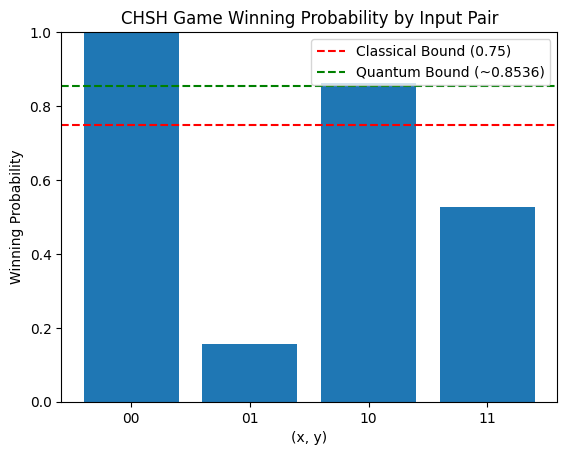

In [19]:
# Import necessary Qiskit modules
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define measurement angles for CHSH (optimal for maximum violation)
theta_a0 = 0.0  # Alice's first basis (σ_z)
theta_a1 = np.pi / 4  # Alice's second basis (45°)
theta_b0 = 0.0  # Bob's first basis (σ_z)
theta_b1 = 3 * np.pi / 4  # Bob's second basis (135°)

# Function to create CHSH circuit for given inputs x, y
def create_chsh_circuit(x, y):
    qr = QuantumRegister(2, 'q')
    cr_a = ClassicalRegister(1, 'cr_a')
    cr_b = ClassicalRegister(1, 'cr_b')
    qc = QuantumCircuit(qr, cr_a, cr_b)

    # Prepare Bell state
    qc.h(qr[0])
    qc.cx(qr[0], qr[1])

    # Apply rotations based on inputs x, y
    if x == 1:
        qc.ry(theta_a1, qr[0])  # Rotate Alice's qubit to 45°
    if y == 1:
        qc.ry(theta_b1, qr[1])  # Rotate Bob's qubit to 135°

    # Measure in computational basis
    qc.measure(qr[0], cr_a[0])
    qc.measure(qr[1], cr_b[0])

    return qc

# Function to compute correlation for CHSH parameter
def get_correlation(x, y, n_shots=1024):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    if x == 1:
        qc.ry(theta_a1, 0)
    if y == 1:
        qc.ry(theta_b1, 1)
    qc.measure_all()
    job = AerSimulator().run(qc, shots=n_shots)
    counts = job.result().get_counts()
    p00 = counts.get('00', 0) / n_shots
    p01 = counts.get('01', 0) / n_shots
    p10 = counts.get('10', 0) / n_shots
    p11 = counts.get('11', 0) / n_shots
    return p00 - p01 - p10 + p11

# Simulate CHSH game for multiple rounds
n_shots = 4096
results = {'00': 0, '01': 0, '10': 0, '11': 0}  # Wins per (x, y)
total_trials = {'00': 0, '01': 0, '10': 0, '11': 0}  # Track valid trials
for _ in range(n_shots):
    x = np.random.randint(0, 2)
    y = np.random.randint(0, 2)

    qc = create_chsh_circuit(x, y)
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1)
    result = job.result()
    counts = result.get_counts()

    print(f"Raw counts for (x, y) = ({x}, {y}): {counts}")

    key = list(counts.keys())[0]
    outcomes = key.split()
    if len(outcomes) == 2 and all(c in '01' for c in ''.join(outcomes)):
        a = int(outcomes[0])
        b = int(outcomes[1])
        total_trials[str(x) + str(y)] += 1
        win_condition = (a ^ b) == (x & y)
        if win_condition:
            results[str(x) + str(y)] += 1
    else:
        print(f"Warning: Invalid key format {key}, skipping this round")

# Calculate winning probability
win_probs = {key: results[key] / total_trials[key] if total_trials[key] > 0 else 0.0 for key in results}
total_win_prob = sum(results.values()) / sum(total_trials.values()) if sum(total_trials.values()) > 0 else 0.0

# Compute CHSH expectation value
s = (get_correlation(0, 0) + get_correlation(0, 1) + get_correlation(1, 0) - get_correlation(1, 1))

# Print results
print(f"\nWinning probability for each (x, y): {win_probs}")
print(f"Overall winning probability: {total_win_prob:.4f}")
print(f"Classical bound: 0.75 (with shared randomness: 0.8536)")
print(f"Quantum maximum (Tsirelson bound): ~0.8536")
print(f"CHSH Expectation Value: {s:.4f} (Max quantum: 2.828, Normalized max: 0.7071)")

# Visualize results
plt.bar(win_probs.keys(), win_probs.values())
plt.title("CHSH Game Winning Probability by Input Pair")
plt.xlabel("(x, y)")
plt.ylabel("Winning Probability")
plt.ylim(0, 1)
plt.axhline(y=0.75, color='r', linestyle='--', label='Classical Bound (0.75)')
plt.axhline(y=0.8536, color='g', linestyle='--', label='Quantum Bound (~0.8536)')
plt.legend()
plt.show()

qc_sample = create_chsh_circuit(1, 1)
job_sample = simulator.run(qc_sample, shots=2048)
result_sample = job_sample.result()
counts_sample = result_sample.get_counts()
plot_histogram(counts_sample, title="Measurement Outcomes for (x, y) = (1, 1)")
plt.show()